# Hausarbeit im Modul „Data Science und Machine Learning“ WS22/23 - Teil 1

## Data cleaning

In [42]:
import pandas as pd

finTechDF = pd.DataFrame(pd.read_csv('https://raw.githubusercontent.com/VAWi-DataScience/Data-Science-and-Machine-Learning/main/Assignment/WiSe22_23/01_FinTech_Churn.csv', sep=";"))

In [43]:
finTechDF

,CCreditScore,CGeography,CGender,CAge,CTenure,CBalance,CNumOfProducts,CHasCrCard,CIsActiveMember,CEstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [44]:
print(finTechDF.dtypes)

CCreditScore          int64
CGeography           object
CGender              object
CAge                  int64
CTenure               int64
CBalance            float64
CNumOfProducts        int64
CHasCrCard            int64
CIsActiveMember       int64
CEstimatedSalary     object
Churn                 int64
dtype: object


In [45]:
finTechDF['CEstimatedSalary'] = pd.to_numeric(finTechDF['CEstimatedSalary'], errors='coerce')
finTechDF.isna().sum()

CCreditScore        0
CGeography          0
CGender             0
CAge                0
CTenure             0
CBalance            0
CNumOfProducts      0
CHasCrCard          0
CIsActiveMember     0
CEstimatedSalary    1
Churn               0
dtype: int64

In [46]:
finTechDF.dropna()
finTechDF.dtypes

CCreditScore          int64
CGeography           object
CGender              object
CAge                  int64
CTenure               int64
CBalance            float64
CNumOfProducts        int64
CHasCrCard            int64
CIsActiveMember       int64
CEstimatedSalary    float64
Churn                 int64
dtype: object

In [47]:
finTechDF = pd.get_dummies(finTechDF, columns=['CGeography'], dtype='int64')
finTechDF = pd.get_dummies(finTechDF, columns=['CGender'], dtype='int64')
finTechDF

,CCreditScore,CAge,CTenure,CBalance,CNumOfProducts,CHasCrCard,CIsActiveMember,CEstimatedSalary,Churn,CGeography_France,CGeography_Germany,CGeography_Spain,CGender_Female,CGender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


## 1. Apply three different simple machine learning models, which we discussed in lecture 02. Describe your approach, interpret the performance, and justify (based on the results) which machine learning model you would choose.

In [48]:
import numpy as np
#Spliting dataset in two parts: feature set and target label
finTechDF = finTechDF.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X = finTechDF.drop('Churn', axis=1)
y = finTechDF['Churn']


In [49]:
# Partition data into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
# Import Decision Tree model
from sklearn.tree import DecisionTreeClassifier
# Create a Decision Tree classifier object
clf_tree = DecisionTreeClassifier(random_state=42, min_samples_leaf = 0.04)

# Train the model using training dataset
clf_tree = clf_tree.fit(X_train,y_train)


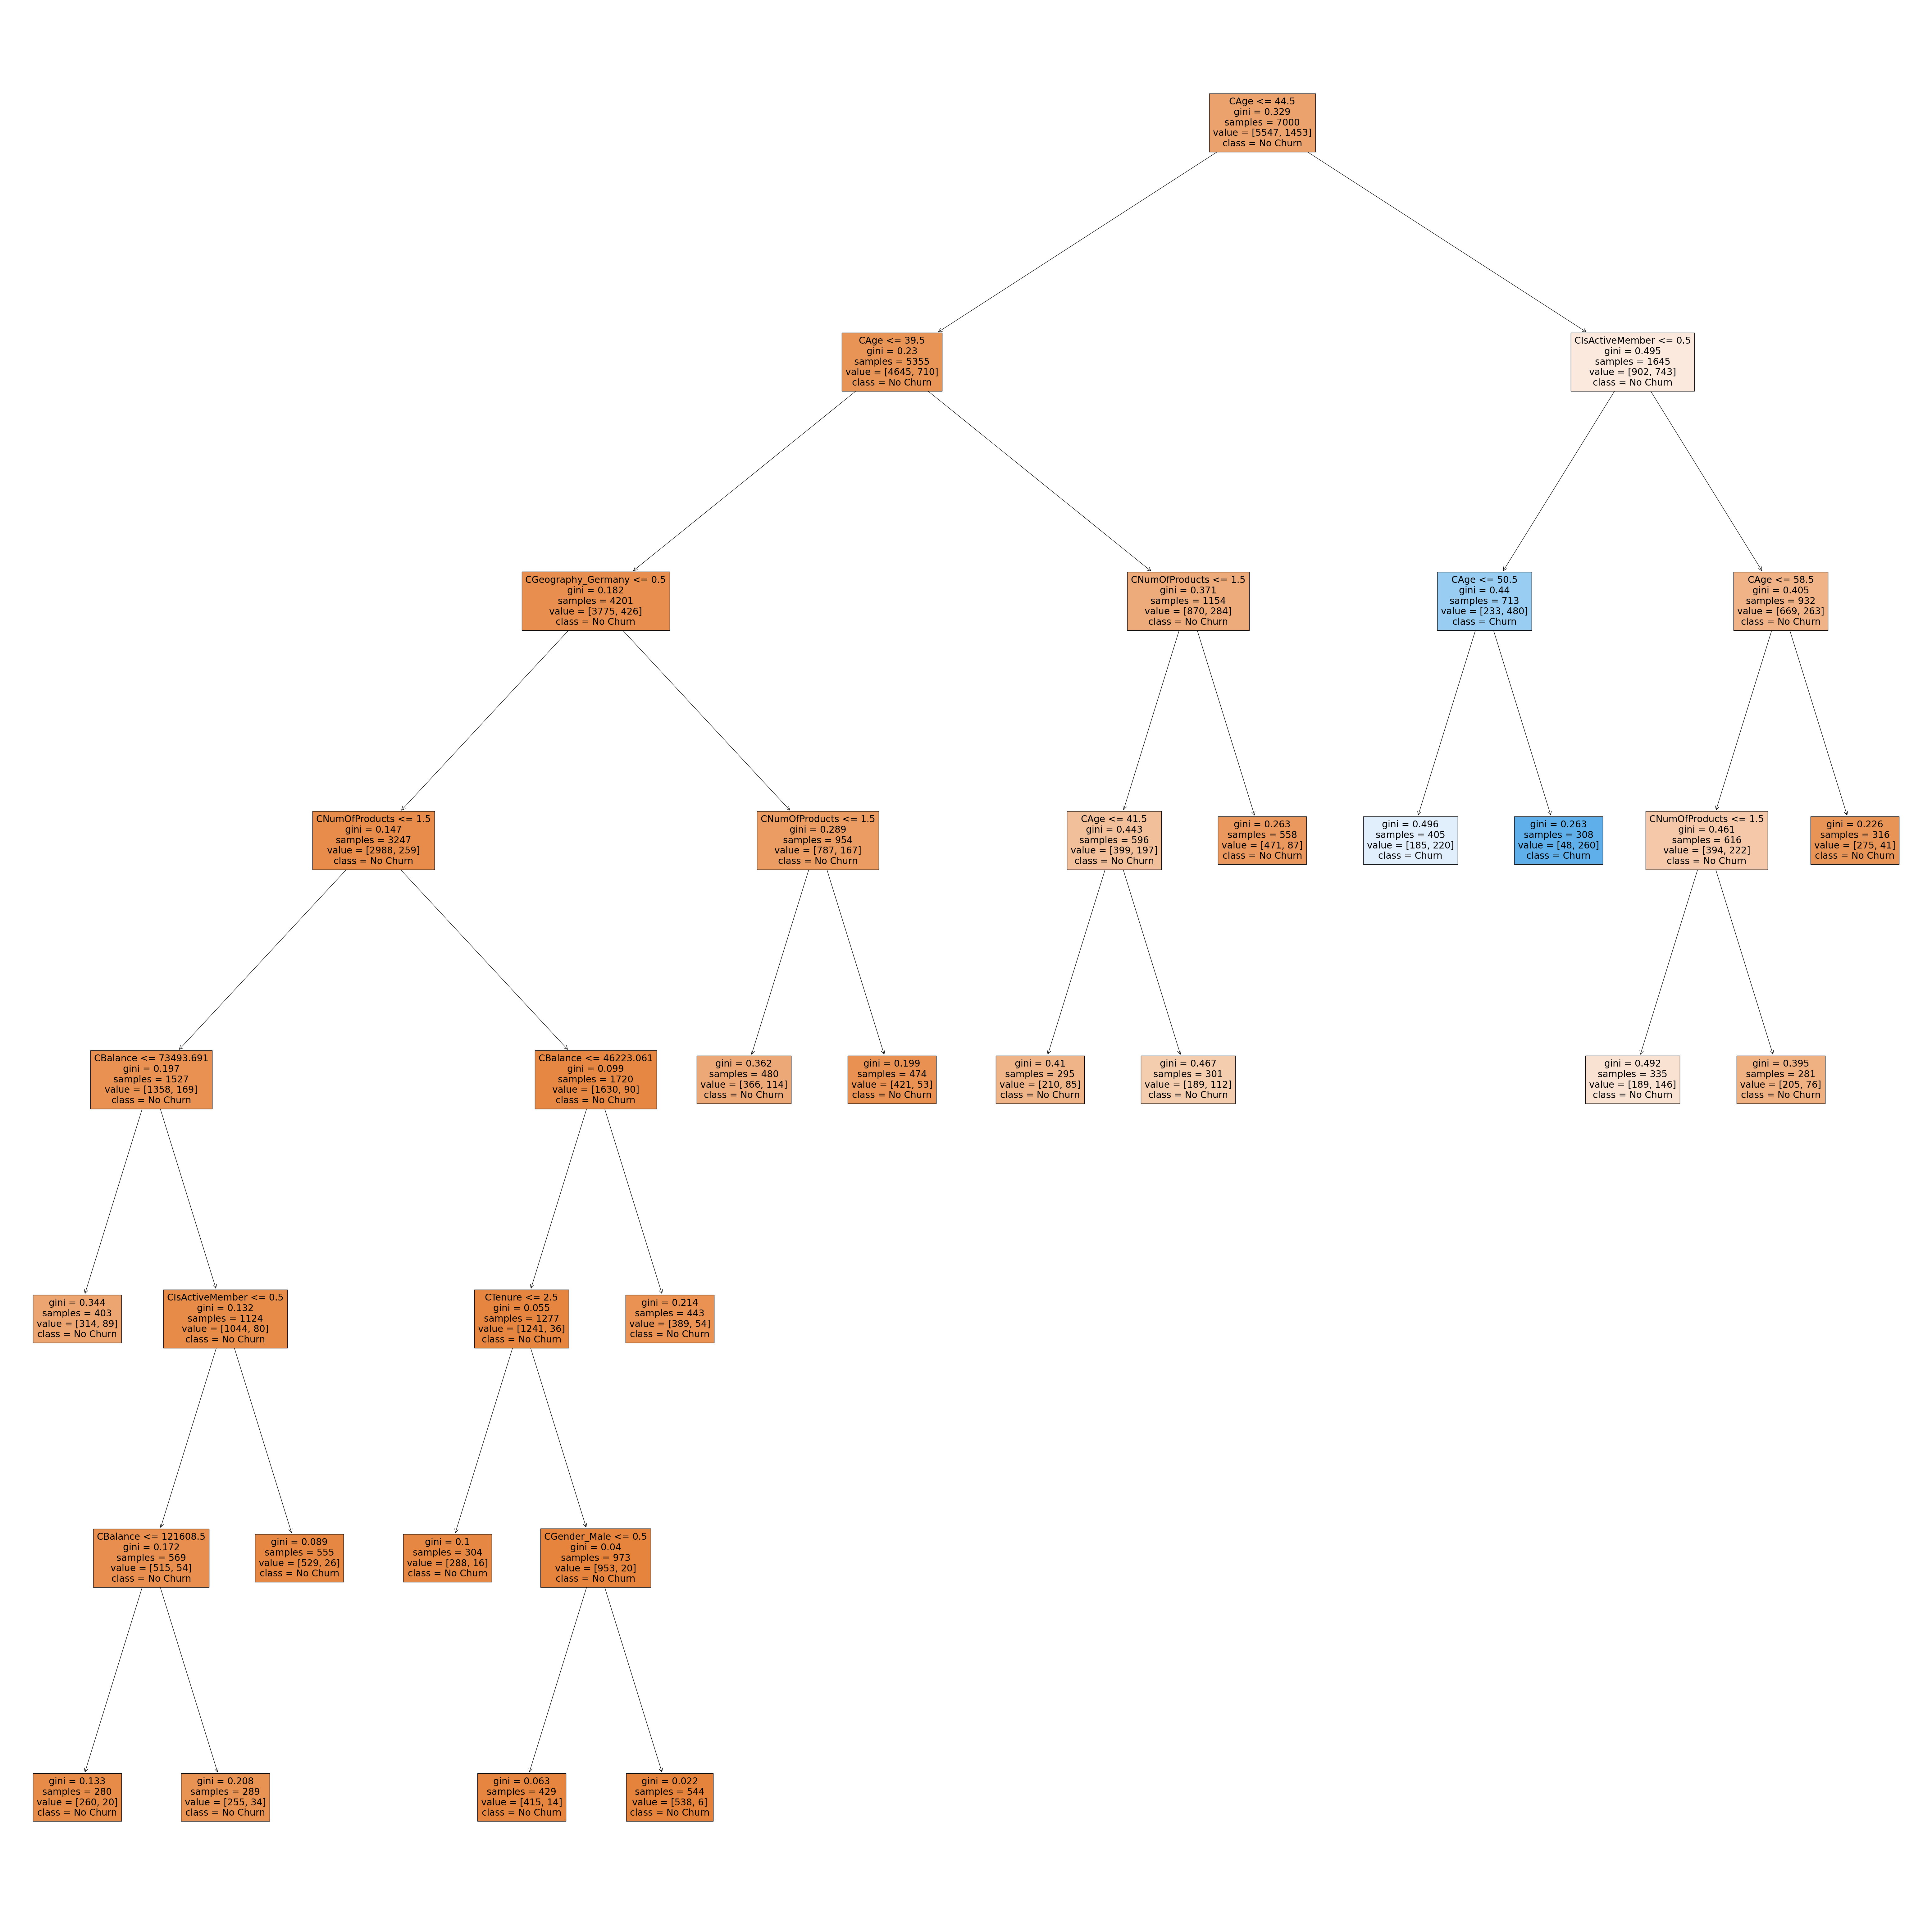

In [51]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(80,80))  # Create a plot for the decision tree
_ = tree.plot_tree(clf_tree,feature_names = X_train.columns, filled=True, class_names= ["No Churn","Churn"])
plt.show()

In [52]:
# Predict the response for training dataset
y_pred_train = clf_tree.predict(X_train)
# Predict the response for test dataset
y_pred_test = clf_tree.predict(X_test)

In [53]:
# Import metrics module for performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
accuracyDT = accuracy_score(y_test, y_pred_test)
precisionDT = precision_score(y_test, y_pred_test)
recallDT = recall_score(y_test, y_pred_test)
f1ScoreDT = f1_score(y_test, y_pred_test)
# Calculate model accuracy
print("Accuracy:",accuracyDT)
# Calculate model precision
print("Precision:",precisionDT)
# Calculate model recall
print("Recall:",recallDT)
# Calculate model f1 score
print("F1-Score:",f1ScoreDT)

Accuracy: 0.8376666666666667
Precision: 0.6678200692041523
Recall: 0.3304794520547945
F1-Score: 0.4421534936998855


## Confusion matrix (training data)

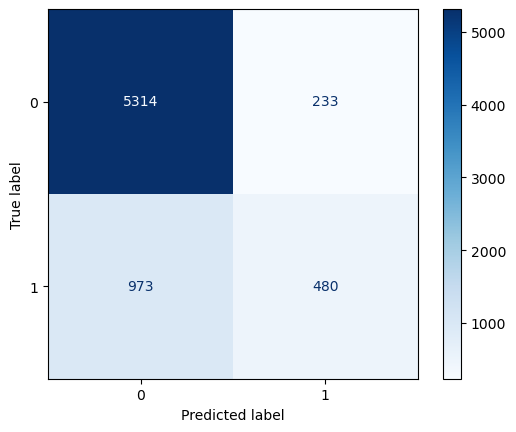

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
y_pred = clf_tree.predict(X_train)
cm = confusion_matrix(y_train, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_tree.classes_)
disp.plot(values_format='d', cmap=plt.cm.Blues)


In [55]:
import numpy as np
# Predict the response for training dataset
np.sum(np.equal(y_train, y_pred_train)) / len(y_train)

0.8277142857142857

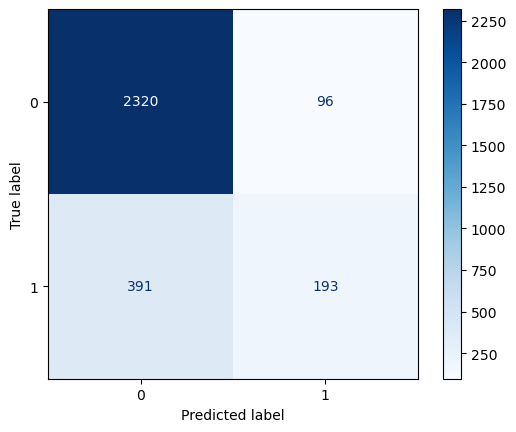

In [56]:
# TODO Write comment
# Create confusion matrix to show the performance of the algorithm
y_pred_test = clf_tree.predict(X_test)

# Import the necessary functions
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, values_format='d')


## kNN Classification



In [57]:
#Spliting dataset in two parts: feature set and target label
finTechDF = finTechDF.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X = finTechDF.drop('Churn', axis=1)
y = finTechDF['Churn']

#scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X)
pd.DataFrame(X_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.344595,0.295101,-1.035726,-1.222055,-0.903352,0.645981,0.970714,0.009073,0.998287,-0.575591,-0.577790,1.098232,-1.098232
1,-0.458910,0.199916,-1.382503,0.118528,-0.903352,-1.548034,0.970714,0.203221,-1.001716,-0.575591,1.730732,1.098232,-1.098232
2,-1.560488,0.295101,1.044940,1.331864,2.542677,0.645981,-1.030169,0.227312,0.998287,-0.575591,-0.577790,1.098232,-1.098232
3,0.486785,0.009546,-1.382503,-1.222055,0.819663,-1.548034,-1.030169,-0.121395,0.998287,-0.575591,-0.577790,1.098232,-1.098232
4,2.056014,0.390286,-1.035726,0.785604,-0.903352,0.645981,0.970714,-0.377094,-1.001716,-0.575591,1.730732,1.098232,-1.098232
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.235026,0.009546,0.004607,-1.222055,0.819663,0.645981,-1.030169,-0.079005,0.998287,-0.575591,-0.577790,-0.910554,0.910554
9996,-1.414996,-0.371195,1.738495,-0.304376,-0.903352,0.645981,0.970714,0.015159,0.998287,-0.575591,-0.577790,-0.910554,0.910554
9997,0.590707,-0.276010,0.698162,-1.222055,-0.903352,-1.548034,0.970714,-1.018809,0.998287,-0.575591,-0.577790,1.098232,-1.098232
9998,1.245419,0.295101,-0.688948,-0.021157,0.819663,0.645981,-1.030169,-0.137666,-1.001716,1.737346,-0.577790,-0.910554,0.910554


In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test) #Test data is also scaled, but the Scaler is only fitted with the training data

c:\Users\Flori\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Flori\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [59]:
# Import KNN model
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier object
clf_kNN = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training dataset
clf_kNN.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

In [60]:
# Predict the y variable for train dataset
y_pred_train_knn = clf_kNN.predict(X_train_scaled)

# Import metrics module for performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Calculate model accuracy
print("Accuracy:",accuracy_score(y_train, y_pred_train_knn))
# Calculate model precision
print("Precision:",precision_score(y_train, y_pred_train_knn))
# Calculate model recall
print("Recall:",recall_score(y_train, y_pred_train_knn))
# Calculate model f1 score
print("F1-Score:",f1_score(y_train, y_pred_train_knn))

Accuracy: 0.8908571428571429
Precision: 0.805678793256433
Recall: 0.6249139710942877
F1-Score: 0.703875968992248


In [61]:
# Predict the y variable for test dataset
y_pred_test_knn = clf_kNN.predict(X_test_scaled)

# Import metrics module for performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


# Calculate model accuracy
print("Accuracy:",accuracy_score(y_test, y_pred_test_knn))
# Calculate model precision
print("Precision:",precision_score(y_test, y_pred_test_knn))
# Calculate model recall
print("Recall:",recall_score(y_test, y_pred_test_knn))
# Calculate model f1 score
print("F1-Score:",f1_score(y_test, y_pred_test_knn))

Accuracy: 0.8293333333333334
Precision: 0.581081081081081
Recall: 0.4417808219178082
F1-Score: 0.5019455252918288


In [62]:
accuracy = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    pred_i = knn.predict(X_test_scaled)
    accuracy.append(accuracy_score(y_test, pred_i))

Text(0, 0.5, 'Accuracy')

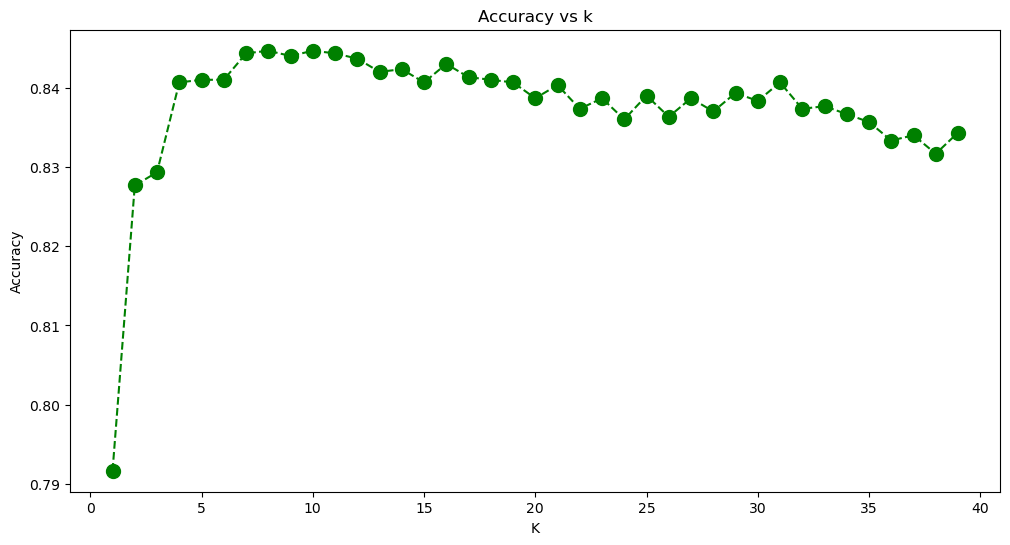

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), accuracy, color='green', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Accuracy vs k')
plt.xlabel('K')
plt.ylabel('Accuracy')

In [64]:
# As we can see, k = 10 has the highest accuracy.
clf_kNN = KNeighborsClassifier(n_neighbors=10)

clf_kNN.fit(X_train_scaled, y_train)

y_pred_train_knn = clf_kNN.predict(X_train_scaled)

# Predict the y variable for test dataset
y_pred_test_knn = clf_kNN.predict(X_test_scaled)

In [65]:
accuracyKNN = accuracy_score(y_train, y_pred_train_knn)
precisionKNN = precision_score(y_train, y_pred_train_knn)
recallKNN = recall_score(y_train, y_pred_train_knn)
f1ScoreKNN = f1_score(y_train, y_pred_train_knn)

# Calculate model accuracy
print("Accuracy:",accuracyKNN)
# Calculate model precision
print("Precision:",precisionKNN)
# Calculate model recall
print("Recall:",recallKNN)
# Calculate model f1 score
print("F1-Score:",f1ScoreKNN)

Accuracy: 0.8508571428571429
Precision: 0.8065967016491754
Recall: 0.37026841018582246
F1-Score: 0.5075471698113208


## Navive Bayes

In [66]:
# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
# Create a Gaussian Classifier
clf_gnb = GaussianNB()
# Train the model using the training dataset
clf_gnb.fit(X_train,y_train)

GaussianNB()

In [67]:
# Predict the y variable for train dataset
y_pred_train = clf_gnb.predict(X_train)
# Calculate model accuracy
print("Accuracy:",accuracy_score(y_train, y_pred_train))
# Calculate model precision
print("Precision:",precision_score(y_train, y_pred_train))
# Calculate model recall
print("Recall:",recall_score(y_train, y_pred_train))
# Calculate model f1 score
print("F1-Score:",f1_score(y_train, y_pred_train))

Accuracy: 0.8118571428571428
Precision: 0.5691056910569106
Recall: 0.38540949759119064
F1-Score: 0.45958145260566274


In [68]:
# Predict the y variable for test dataset
y_pred_train = clf_gnb.predict(X_test)

accuracyGNB = accuracy_score(y_test, y_pred_test)
precisionGNB = precision_score(y_test, y_pred_test)
recallGNB = recall_score(y_test, y_pred_test)
f1ScoreGNB = f1_score(y_test, y_pred_test)

# Calculate model accuracy
print("Accuracy:", accuracyGNB)
# Calculate model precision
print("Precision:", precisionGNB)
# Calculate model recall
print("Recall:", recallGNB)
# Calculate model f1 score
print("F1-Score:", f1ScoreGNB)

Accuracy: 0.8376666666666667
Precision: 0.6678200692041523
Recall: 0.3304794520547945
F1-Score: 0.4421534936998855


To check, which algorithm is the most suitable, we compare the accuracies of the different algorithms

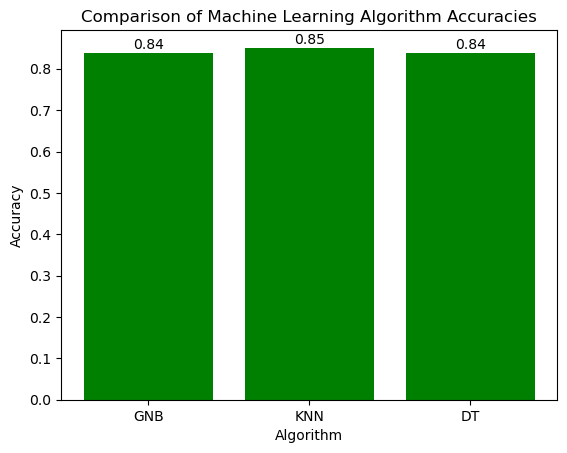

In [69]:
# Create list of algorithms and accuracies
algorithms = ['GNB', 'KNN', 'DT']
accuracies = [accuracyGNB, accuracyKNN, accuracyDT]

# Create bar chart
plt.bar(algorithms, accuracies, color='green')

# Display accuracies as text on the bars
for i, v in enumerate(accuracies):
    plt.text(i, v+0.01, str(round(v, 2)), ha='center')

# Add chart title and axis labels
plt.title('Comparison of Machine Learning Algorithm Accuracies')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')

# Show the chart
plt.show()

Based on the results of the calculations the kNN-algorithm performs the best.

## 2. Select the machine learning model that you have chosen in task 1. Now try optimizing your results by applying the advanced concepts (lecture 04). Use cross-validation (lecture 04) when evaluating your results. Describe your approach, interpret the performance, and justify which machine learning model you would choose.

In [70]:
feature_set = ['CCreditScore', 'CGeography_France', 'CGeography_Germany', 'CGeography_Spain', 'CGender_Male', 'CGender_Female', 'CAge', 'CTenure', 'CBalance', 'CNumOfProducts', 'CHasCrCard', 'CIsActiveMember', 'CEstimatedSalary']
X = finTechDF[feature_set]
y = finTechDF.Churn

In [71]:
finTechDF.Churn.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [72]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

ros = RandomOverSampler(random_state=0)

X_oversampled, y_oversampled = ros.fit_resample(X, y)

In [73]:
y_oversampled.value_counts()

1    7963
0    7963
Name: Churn, dtype: int64

In [74]:
# Partition data into training and testing set
from sklearn.model_selection import train_test_split
X_train_OS, X_test_OS, y_train_OS, y_test_OS = train_test_split(X_oversampled, y_oversampled, test_size=0.3, random_state=42)

Text(0, 0.5, 'Accuracy')

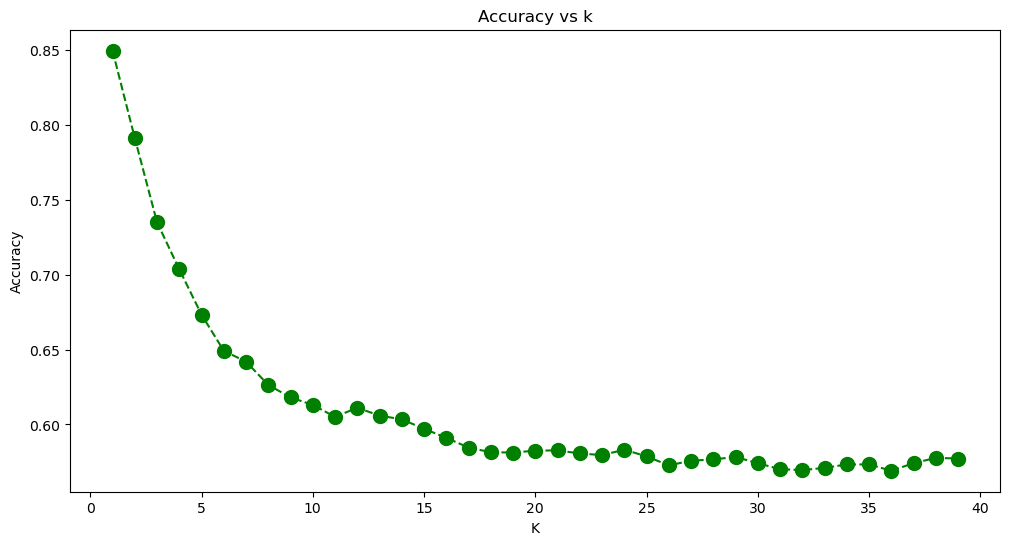

In [75]:
accuracy = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_OS, y_train_OS)
    pred_i = knn.predict(X_test_OS)
    accuracy.append(accuracy_score(y_test_OS, pred_i))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), accuracy, color='green', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Accuracy vs k')
plt.xlabel('K')
plt.ylabel('Accuracy')

In [76]:
# As we can see, k = 1 has the highest accuracy.
clf_kNN_OS = KNeighborsClassifier(n_neighbors=1)

# Train the model using training dataset
clf_kNN_OS = clf_kNN_OS.fit(X_train_OS,y_train_OS)

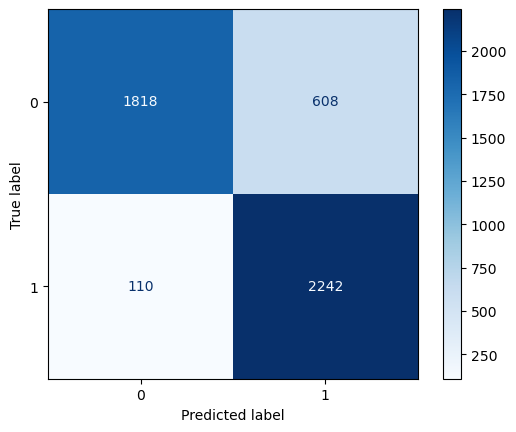

In [77]:
# Predict the response for test dataset
y_pred_test_OS = clf_kNN_OS.predict(X_test_OS)

# Import the necessary functions
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test_OS, y_pred_test_OS)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, values_format='d')

In [78]:
# Oversampling
# Import metrics module for performance evaluation
from sklearn.metrics import accuracy_score
# Calculate model accuracy
print("Accuracy:",accuracy_score(y_test_OS, y_pred_test_OS))

Accuracy: 0.8497279196316451


In [79]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf_kNN_OS, X_train_OS, y_train_OS, scoring='accuracy')
print("Cross validation scores: {}". format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("Standard deviation: {:.2f}".format(scores.std()))

Cross validation scores: [0.80986547 0.81165919 0.81928251 0.80888291 0.82727681]
Average cross-validation score: 0.82
Standard deviation: 0.01


In [80]:
# accuracy scores
y_pred_train_OS = clf_kNN_OS.predict(X_train_OS)
print("Accuracy of training data:", accuracy_score(y_train_OS, y_pred_train_OS))
print("Accuracy of test data:", accuracy_score(y_test_OS, y_pred_test_OS))
print("Accuracy of cross-validation:", cross_val_score(clf_kNN_OS, X_train_OS,y_train_OS, scoring='accuracy').mean())

Accuracy of training data: 1.0
Accuracy of test data: 0.8497279196316451
Accuracy of cross-validation: 0.8153933775527242


The accuracy of the cross validation is worse than the performance of the training set, thus the model seems to suffer from high variance (i.e. overfitting).